# **Hyperparameter optimzation**

## **Introduction**:
We must distinguish between parameters and hyperparameters in machine learning. For the provided data set, a learning algorithm learns or predicts the model parameters before updating these values over time. These variables are added to the model once learning is complete. One example of a parameter is each weight and bias in a neural network.

On the other hand, we cannot determine the values of hyperparameters from the data because they are unique to the algorithm itself. To determine the model parameters, we employ hyperparameters. For a given data collection, various hyperparameter values result in various model parameter values.

Finding a set of ideal hyperparameter values for a learning algorithm and using this tuned algorithm on any data set is hyperparameter tuning. The model's performance is maximized by using that set of hyperparameters, which minimizes a predetermined loss function and resulting in better results with fewer errors. It should be noted that the learning algorithm attempts to discover the best solution within the constraints and optimizes the loss depending on the input data. Hyperparameters, however, precisely specify this configuration.

To tune parameters, we might, for instance, employ neural networks, support-vector machines (SVMs), Bayesian networks, and Extreme Gradient Boosting (XGB) if we are working on natural language processing (NLP) models.



## **The difference between Hyperparameters and parameters can be understood by the diagram below:**



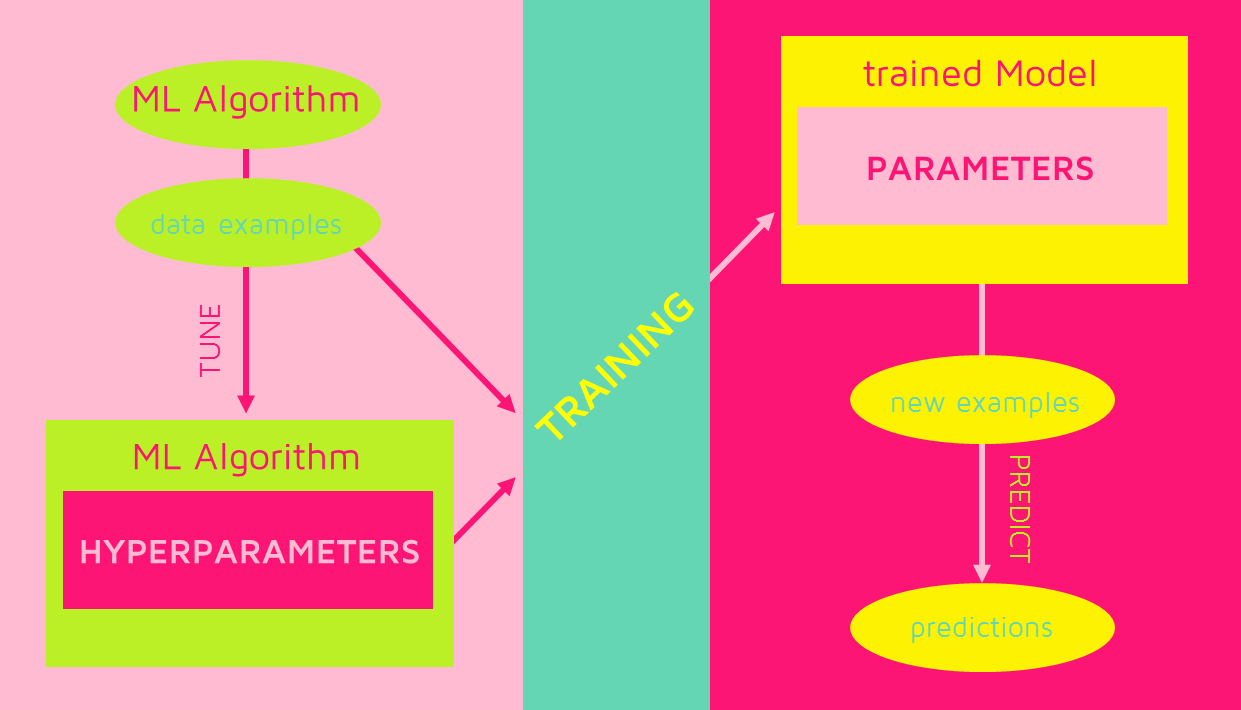

**Explanation**: 
A trained model is a specific mathematical function that is part of a family of functions that are determined by a certain tuple of parameters and belongs to a specific type of machine learning method. Model parameters, or simply parameters, are what the machine will use to learn from data, the training feature set, and they allow for the modification of the function. The parameters of the model are automatically fitted using some training data. The variables in this trained model are the features.

However, in order to specify how the ML algorithm is going to generate a trained model, more parameters are required. In ML, we refer to this particular category of parameter as a hyperparameter. Hyperparameters must be manually or automatically set before to the training phase as they cannot be learned using the method that requires them. These parameters are also known as tuning parameters, free parameters, and meta parameters.

Parameters are the outcome of fitting during training, whereas hyperparameters are part of the input we provide to the ML algorithm. 

Hyperparameters are typically excluded from training for two main reasons: In some cases, it is preferable to favor generalization over overfitting by not fitting the values. Even so, the conventional explanation is that there is no analytical formula that can be optimized, preventing their inclusion in the training.



### **What are the Hyperparameter Tuning Techniques?**
Hyperparameter tuning techniques can be broadly classified into two categories: manual and automated tuning.

**1. Manual Tuning:**
Manual tuning involves manually setting the hyperparameters based on domain knowledge, intuition, or trial and error. Manual tuning is often time-consuming and requires a deep understanding of the model and the data.

**2. Automated Tuning:**
Automated tuning involves using algorithms to search for the best set of hyperparameters automatically. Some popular automated tuning techniques are:

**a. Grid Search:**
Grid search involves specifying a range of hyperparameters and searching for the best combination of hyperparameters by evaluating the model on all possible combinations.

**b. Random Search:**
Random search involves randomly sampling the hyperparameters from a predefined range of values and evaluating the model on each set of hyperparameters.

**c. Bayesian Optimization:**
Bayesian optimization is a probabilistic approach to hyperparameter tuning that builds a probabilistic model of the objective function and uses this model to choose the next set of hyperparameters to evaluate.


**The diagram below will give you the flow chart of the types of Hyperparameter Tuning**

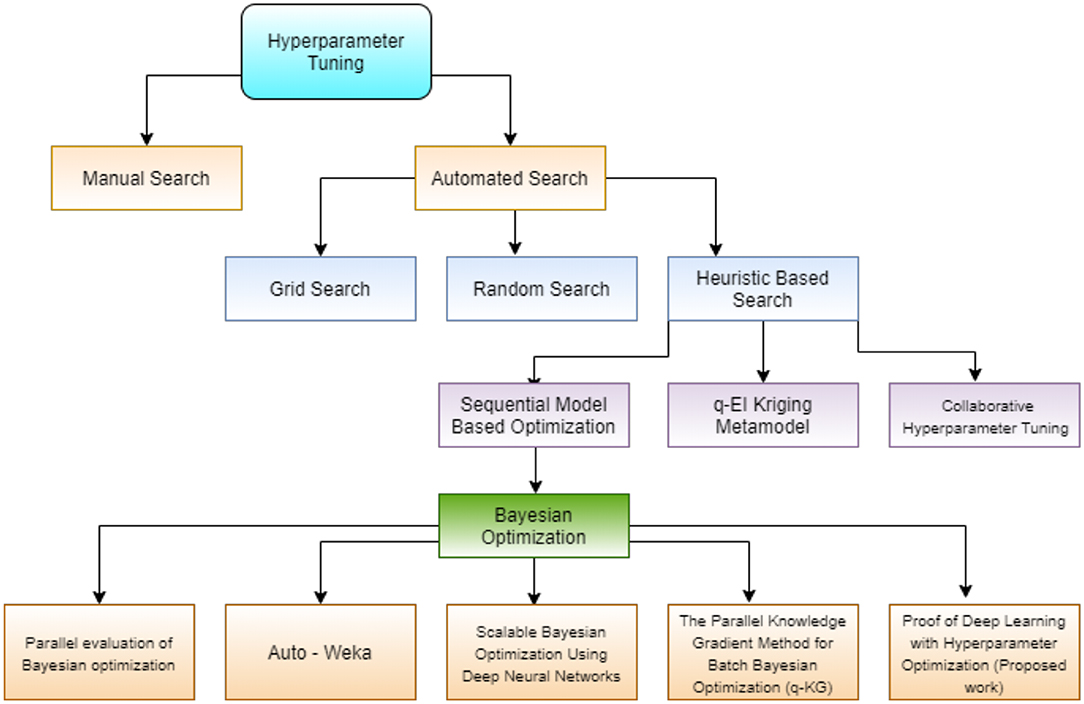

## **What is the need of Hyperparameter Optimization?**



### **Lets look at the diagram to understand where exactly hyperparameter optimization us need**





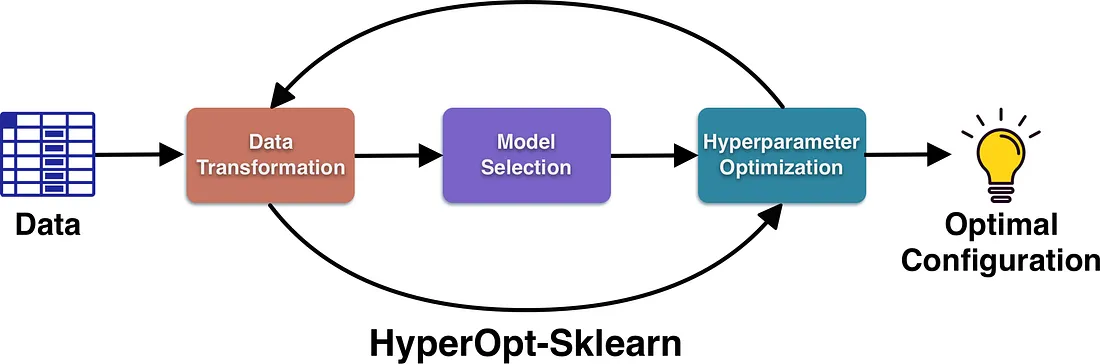

From the above diagram it is clear that the HyperOpt-Sklearn was created with the objective of optimizing machine learning pipelines, addressing specifically the phases of data transformation, model selection and hyperparameter optimization.

We have an example of the HyperOpt using Bayesian Model in the next sections

##**In the first section lets learn about Manual Tuning**


# **Manual Tunning**

In order to better understand how various hyperparameters effect your model's performance, manual tweaking is a smart place to start when optimizing them. However, if we need to tune several hyperparameters or if we need to tune them for several different models, it can be time-consuming and may not be practical.


In these circumstances, we might want to think about applying more sophisticated hyperparameter optimization methods, including grid search, random search, or Bayesian optimization. These techniques frequently result in greater performance than manual tuning and can help us locate appropriate hyperparameters more quickly.

It's crucial to keep in mind that, regardless of the strategy you choose, hyperparameter optimization is an iterative process that necessitates thorough experimentation and analysis. To prevent overfitting and to make sure that our model generalizes well to new data, let's be sure to assess the performance of our model on both the training and test sets.


In [ ]:
import pandas as pd
import numpy as np

# Modeling
import lightgbm as lgb

# Evaluation of the model
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

MAX_EVALS = 2
N_FOLDS = 2

In [ ]:
# Read in data and separate into training and testing sets
url = 'https://raw.githubusercontent.com/Pramita0410/crash-course-dsem/main/caravan-insurance-challenge.csv'
data = pd.read_csv(url)


### **LETS TRAIN AND TEST OUR DATASET**

In [ ]:
train = data[data['ORIGIN'] == 'train']
test = data[data['ORIGIN'] == 'test']

# Extract the labels and format properly
train_labels = np.array(train['CARAVAN'].astype(np.int32)).reshape((-1,))
test_labels = np.array(test['CARAVAN'].astype(np.int32)).reshape((-1,))

# Drop the unneeded columns
train = train.drop(columns = ['ORIGIN', 'CARAVAN'])
test = test.drop(columns = ['ORIGIN', 'CARAVAN'])

# Convert to numpy array for splitting in cross validation
features = np.array(train)
test_features = np.array(test)
labels = train_labels[:]

print('Train shape: ', train.shape)
print('Test shape: ', test.shape)
train.head()

Train shape:  (5822, 85)
Test shape:  (4000, 85)


,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,0,1,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,0,1,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,0,1,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,0,1,0,0,0,0,0


example of how we can manually tune the hyperparameters of a Random Forest classifier using cross-validation:

## **Grid Search** 

We test every conceivable combination of the set of hyperparameters using the grid search technique. An artificial intelligence model is represented by each combination of the hyperparameters. N combinations therefore stand for N machine learning models. We locate the model with the best performance using grid search.


This means that while using the grid search method, we build a grid of potential hyperparameter values. Each iteration tries a set of hyperparameters in a certain sequence. It tracks the model performance when fitting the model with every conceivable set of hyperparameters. The best model with the best hyperparameters is then returned.



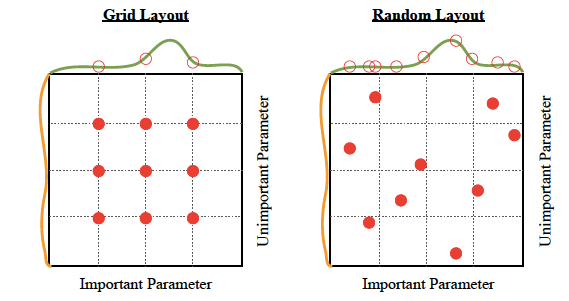

The code below performs a grid search for hyperparameters of a random forest classifier using cross-validation, finds the best hyperparameters, and trains a final model on them. The performance of the final model is then evaluated on a test set. The goal is to improve the performance of the random forest classifier.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters to tune
n_estimators = [50, 100, 150]
max_depth = [10, 20, 30]
min_samples_split = [2, 5, 10]

# Perform grid search using cross-validation
best_score = 0
best_params = {}
for n in n_estimators:
    for d in max_depth:
        for m in min_samples_split:
            clf = RandomForestClassifier(n_estimators=n, max_depth=d, min_samples_split=m, random_state=42)
            score = cross_val_score(clf, features, labels, cv=5).mean()
            if score > best_score:
                best_score = score
                best_params = {'n_estimators': n, 'max_depth': d, 'min_samples_split': m}

# Train the final model on the best hyperparameters
clf = RandomForestClassifier(**best_params, random_state=42)
clf.fit(features, labels)
test_score = clf.score(test_features, test_labels)

print('Best score:', best_score)
print('Best parameters:', best_params)
print('Test score:', test_score)


Best score: 0.9400551598011887
Best parameters: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 10}
Test score: 0.94025


# **Graph plotting**

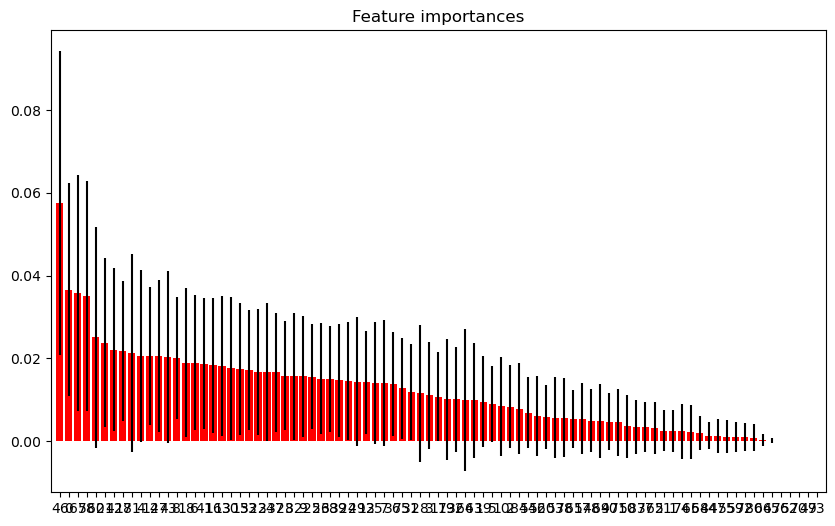

In [ ]:
# Training the final model on the best hyperparameters
clf = RandomForestClassifier(**best_params, random_state=42)
clf.fit(features, labels)

# Plot feature importances
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10,6))
plt.title("Feature importances")
plt.bar(range(features.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(features.shape[1]), indices)
plt.xlim([-1, features.shape[1]])
plt.show()


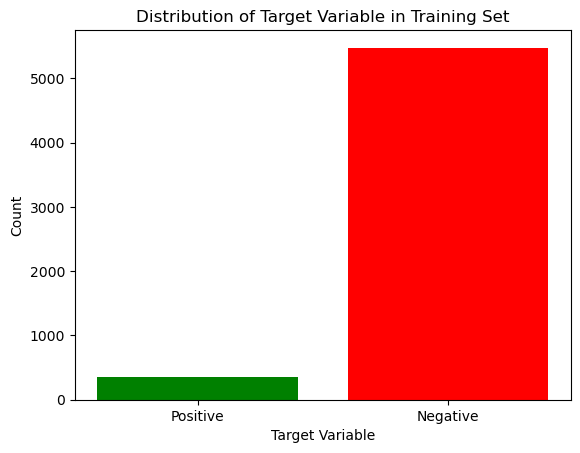

In [ ]:
import matplotlib.pyplot as plt

# Count the number of positive and negative examples in the training set
pos_count = sum(train_labels == 1)
neg_count = sum(train_labels == 0)

# Create a bar plot of the counts
colors = ['green', 'red']

plt.bar(['Positive', 'Negative'],[pos_count, neg_count], color=colors)
plt.title('Distribution of Target Variable in Training Set')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()


In the above graph, it is visible that the number of negative examples is far more than the number of positive ones.

## **Now, let's Plot a graph on Distribution of label**

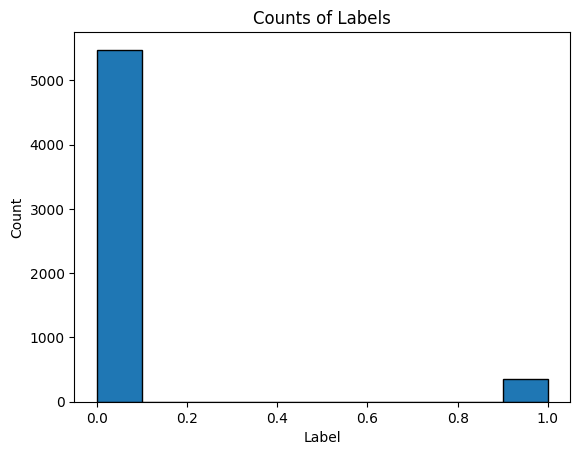

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.hist(labels, edgecolor = 'k'); 
plt.xlabel('Label'); plt.ylabel('Count'); plt.title('Counts of Labels');

Since the number of observations where an insurance policy was not bought (0) is far greater than the number of observations where the policy was bought (1), this is an imbalanced class problem. Hence, using accuracy as a metric would be inappropriate. Instead, we will use the Receiver Operating Characteristic Area Under the Curve (ROC AUC), which is a common metric for classification problems. An ROC AUC of 0.5 indicates a random guess, whereas an ROC AUC of 1.0 suggests a perfect classifier. To establish a better baseline model than random guessing, we will train a Gradient Boosting Machine with default settings and use it to generate predictions.

# **2. Automated Tuning**

# **Gradient Boosting Machine Default Model**

We will use the LightGBM implementation of the gradient boosting machine. This is much faster than the Scikit-Learn implementation and achieves results comparable to extreme gradient boosting, XGBoost. For the baseline model, we will use the default hyperparameters as specified in LightGBM.



In [ ]:
# Model with default hyperparameters
model = lgb.LGBMClassifier()


In [ ]:
model

LGBMClassifier()

All we need to do is fit the model on the training data and make predictions on the testing data. For the predictions, because we are measuring ROC AUC and not accuracy, we have the model predict probabilities and not hard binary values.



In [ ]:
from sklearn.metrics import roc_auc_score
from timeit import default_timer as timer

start = timer()
train_time = timer() - start

model.fit(features, labels)

predictions = model.predict_proba(test_features)[:, 1]
auc = roc_auc_score(test_labels, predictions)

print('The baseline score on the test set is {:.4f}.'.format(auc))
print('The baseline training time is {:.4f} seconds'.format(train_time))

The baseline score on the test set is 0.7089.
The baseline training time is 2.4634 seconds


The baseline score on the test set is 0.7089, which means that the classifier correctly predicted 70.89% of the instances in the test set. This score can be used as a benchmark to compare the performance of other models that will be developed later.

The baseline training time is 2.4634 seconds, which is the time it took for the model to train on the training set. This value can be used to compare the training times of other models and to optimize the training process.

Since the dataset used for this problem contains less than 6000 observations, hyperparameter tuning can have a moderate impact on the performance of the model. However, it's important to note that collecting more data may be a more worthwhile investment of time to improve the model's accuracy.


# **Random Search**

We'll start by creating random search, which is a popular method for optimizing hyperparameters. Each iteration of a random search entails picking a random collection of hyperparameters from a search space. The results from this method are almost as good as those from grid search, but they take a lot less time to find. This strategy has proven to be quite useful in actual use. However, it is still an ignorant strategy because the decisions made during the subsequent evaluation are not based on previous assessments of the objective function.


Although Scikit-Learn provides a built-in implementation of random search using RandomizedSearchCV, we will implement the method ourselves because we are using early stopping to determine the optimal number of estimators. This process is relatively straightforward, and many of the concepts involved in random search will transfer over to Bayesian hyperparameter optimization.

Random search differs from grid search in that we longer provide a discrete set of values to explore for each hyperparameter; rather, we provide a statistical distribution for each hyperparameter from which values may be randomly sampled.

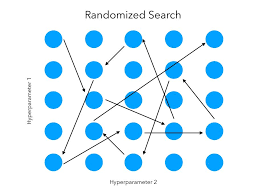

In [ ]:
import random


# **Domain for Random Search**

When searching for optimal hyperparameters, both random search and Bayesian optimization explore a domain of possible values. In the case of random search (or grid search), this domain is defined by a hyperparameter grid, which consists of discrete values for the hyperparameters that need to be tuned.

In [ ]:
lgb.LGBMClassifier()


LGBMClassifier()

Based on the default values, we can construct the following hyperparameter grid. It's difficult to say ahead of time what choices will work best, so we will use a wide range of values centered around the default for most of the hyperparameters.

The subsample_dist will be used for the subsample parameter but we can't put it in the param grid because boosting_type=goss does not support row subsampling. Therefore we will use an if statement when choosing our hyperparameters to choose a subsample ratio if the boosting type is not goss.

In [ ]:
# Hyperparameter grid
param_grid = {
    'class_weight': [None, 'balanced'],
    'boosting_type': ['gbdt', 'goss', 'dart'],
    'num_leaves': list(range(30, 150)),
    'learning_rate': list(np.logspace(np.log(0.005), np.log(0.2), base = np.exp(1), num = 1000)),
    'min_child_samples': list(range(20, 500, 5)),
    'reg_alpha': list(np.linspace(0, 1)),
    'reg_lambda': list(np.linspace(0, 1)),
    'colsample_bytree': list(np.linspace(0.6, 1, 10))
}

# Subsampling  with 'goss'
subsample_dist = list(np.linspace(0.5, 1, 100))

We will examine the distributions of two hyperparameters, namely the learning_rate and the num_leaves. Since the learning_rate can have a wide range of values, it is commonly represented by a logarithmic distribution. To generate values evenly spaced over a logarithmic scale, we can use the function np.logspace. Taking the logarithm of these evenly spaced values will result in a uniform distribution of values.

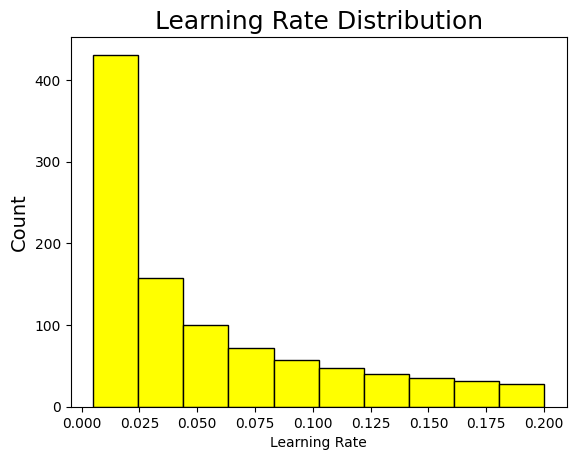

In [ ]:

plt.hist(param_grid['learning_rate'], color = 'yellow', edgecolor = 'k');
plt.xlabel('Learning Rate', size = 10); plt.ylabel('Count', size = 14); plt.title('Learning Rate Distribution', size = 18);

The distribution of learning rates indicates that smaller values are more prevalent, ranging between 0.005 and 0.2. The wide range of the domain suggests that there is considerable uncertainty about the ideal value, which we hope can be found within the grid.


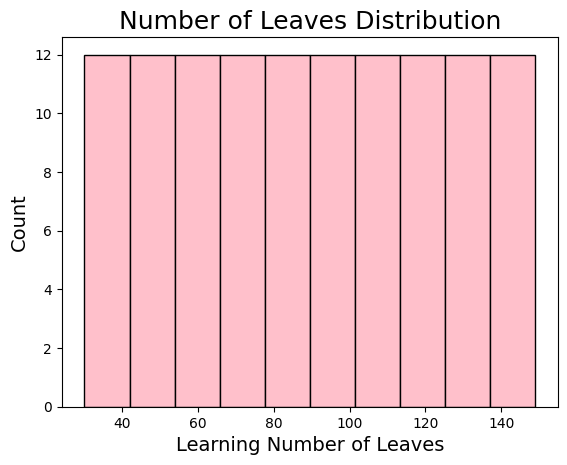

In [ ]:
plt.hist(param_grid['num_leaves'], color = 'pink', edgecolor = 'k')
plt.xlabel('Learning Number of Leaves', size = 14); plt.ylabel('Count', size = 14); plt.title('Number of Leaves Distribution', size = 18);

The parameter "number of leaves" has a straightforward and consistent range of values.


# Sampling from Hyperparameter Domain


Let's look at how we sample a set of hyperparameters from our grid using a dictionary comprehension.



In [ ]:
# Randomly sample parameters for gbm
params = {key: random.sample(value, 1)[0] for key, value in param_grid.items()}
params

{'class_weight': 'balanced',
 'boosting_type': 'goss',
 'num_leaves': 143,
 'learning_rate': 0.03323911555708387,
 'min_child_samples': 150,
 'reg_alpha': 0.4081632653061224,
 'reg_lambda': 1.0,
 'colsample_bytree': 0.9555555555555555}

To add a subsample ratio if the boosting_type is not goss, we can use an if statement.



In [ ]:
params['subsample'] = random.sample(subsample_dist, 1)[0] if params['boosting_type'] != 'goss' else 1.0
params

{'class_weight': 'balanced',
 'boosting_type': 'goss',
 'num_leaves': 143,
 'learning_rate': 0.03323911555708387,
 'min_child_samples': 150,
 'reg_alpha': 0.4081632653061224,
 'reg_lambda': 1.0,
 'colsample_bytree': 0.9555555555555555,
 'subsample': 1.0}

If the boosting type is goss, we assign a subsample value of 1.0, which means that no subsampling is applied. Subsampling is a technique where a subset of the rows (observations) is used for training instead of using all of them. This technique is also known as bagging, which stands for "bootstrap aggregating".



# Cross Validation with Early Stopping in LightGBM


To optimize the degree of fitting to the training data, practitioners tune several key hyperparameters: the number of trees, the learning rate, the maximum depth of each tree, among others. To find the optimal set of values, several configurations are tested in a separate validation dataset; the model performing best in the holdout data is chosen as the final model.

Another tool that helps fight overfitting is early stopping. Common in deep learning, early stopping is a technique where the learning process is halted if the performance on holdout data is not improving. In GBDTs, this implies not building more trees beyond that point.

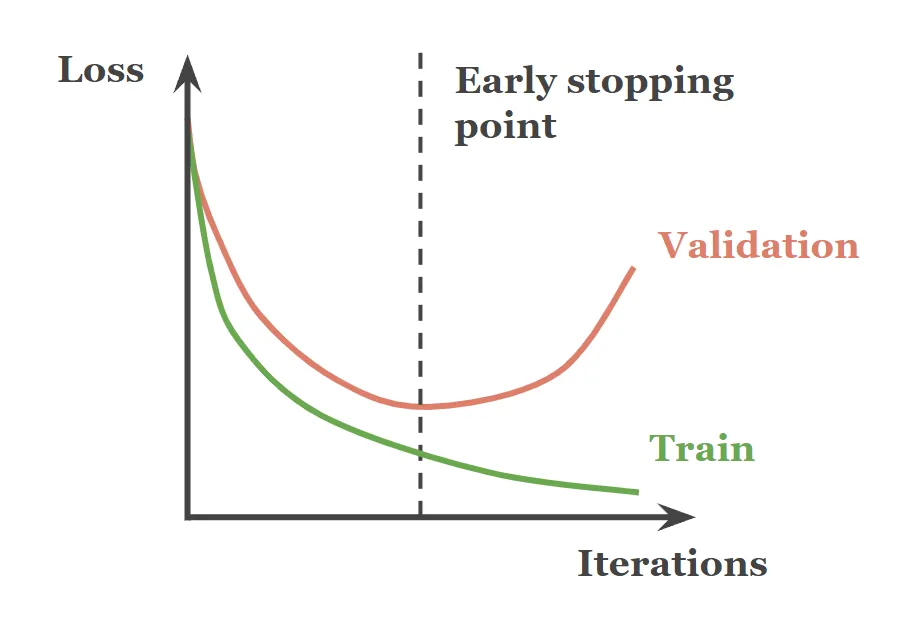

The cross validation functionality in scikit-learn does not support early stopping. As a result, we will use the LightGBM cross validation function, which allows for early stopping with 100 rounds. In order to use this function, we must first create a dataset using our features and labels.


In [ ]:
# Create a lgb dataset
train_set = lgb.Dataset(features, label = labels)

The cv function takes in the parameters, the training data, the number of training rounds, the number of folds, the metric, the number of early stopping rounds, and a few other arguments. We set the number of boosting rounds very high, but we will not actually train this many estimators because we are using early stopping to stop training when the validation score has not improved for 100 estimators.



In [ ]:
# Perform cross validation with 10 folds
r = lgb.cv(params, train_set, num_boost_round = 10000, nfold = 10, metrics = 'auc', 
           early_stopping_rounds = 100, verbose_eval = False, seed = 50)


In [ ]:

# Highest score
r_best = np.max(r['auc-mean'])

# Standard deviation of best score
r_best_std = r['auc-stdv'][np.argmax(r['auc-mean'])]

print('The maximium ROC AUC on the validation set was {:.5f} with std of {:.5f}.'.format(r_best, r_best_std))
print('The ideal number of iterations was {}.'.format(np.argmax(r['auc-mean']) + 1))

The maximium ROC AUC on the validation set was 0.75937 with std of 0.03769.
The ideal number of iterations was 110.


The first statement means that the best performance achieved by the model on the validation set was a ROC AUC score of 0.75937, with a standard deviation of 0.03769. The ROC AUC score is a common evaluation metric for binary classification models, and it measures the ability of the model to correctly distinguish between positive and negative samples. A perfect classifier has an ROC AUC score of 1.0, while a random classifier has an ROC AUC score of 0.5. Therefore, a score of 0.75937 indicates that the model is better than random, but there is still room for improvement.

The second statement means that the ideal number of iterations (also known as the optimal number of trees) for the gradient boosting model was 110. This is the number of decision trees that the model needs to construct to achieve its best performance. The ideal number of iterations was determined using early stopping, a technique that stops the training process if the performance on the validation set stops improving. The optimal number of iterations can vary depending on the dataset and the model, so it is important to determine it for each specific problem.

# **Results Dataframe**


To optimize our hyperparameters using random search, we need a domain and an algorithm, which, in this case, is random selection. Additionally, we require an objective function and a data structure to store the results. These four components are also needed for Bayesian optimization. We will track the results in a dataframe, where each row will represent one evaluation of the objective function.

In [ ]:
# Dataframe to hold cv results
random_results = pd.DataFrame(columns = ['loss', 'params', 'iteration', 'estimators', 'time'],
                       index = list(range(MAX_EVALS)))

**Objective Function**

To optimize our model hyperparameters, we need an objective function to evaluate the performance of each set of hyperparameters. As we are using ROC AUC as our performance metric, we cannot directly evaluate it on the test set since that would lead to overfitting. Instead, we will use KFold cross-validation to estimate the generalization error of our model. In KFold cross-validation, we divide the training data into K subsets and train and evaluate the model K times using a different subset as the validation set each time.

We will track the search progress by storing the hyperparameters used and the resulting validation AUC ROC in a dataframe. This will allow us to compare the performance of different hyperparameter combinations.

Random search does not use past evaluation results to inform the choice of hyperparameters for the next evaluation, but we will still store the results to compare random search with Bayesian optimization.


In [ ]:
def random_objective(params, iteration, n_folds = N_FOLDS):
    """Random search objective function. Takes in hyperparameters
       and returns a list of results to be saved."""

    start = timer()
    
    # Perform n_folds cross validation
    cv_results = lgb.cv(params, train_set, num_boost_round = 10000, nfold = n_folds, 
                        early_stopping_rounds = 100, metrics = 'auc', seed = 50)
    end = timer()
    best_score = np.max(cv_results['auc-mean'])
    
    # Loss must be minimized
    loss = 1 - best_score
    
    # Boosting rounds that returned the highest cv score
    n_estimators = int(np.argmax(cv_results['auc-mean']) + 1)
    
    # Return list of results
    return [loss, params, iteration, n_estimators, end - start]


**Random Search Implementation**

We can create a loop that goes through the specified number of evaluations, selecting a new set of hyperparameters to evaluate each time. The results of each evaluation will be saved to a dataframe. To capture any outputs from running a cell in a Jupyter Notebook, we can use the "%%capture" magic command. This is particularly useful because we cannot suppress the output from a LightGBM training run.

In [ ]:
%%capture

random.seed(50)

# Iterate through the specified number of evaluations
for i in range(MAX_EVALS):
    
    # Randomly sample parameters for gbm
    params = {key: random.sample(value, 1)[0] for key, value in param_grid.items()}
    
    print(params)
    
    if params['boosting_type'] == 'goss':
        # Cannot subsample with goss
        params['subsample'] = 1.0
    else:
        # Subsample supported for gdbt and dart
        params['subsample'] = random.sample(subsample_dist, 1)[0]
        
        
    results_list = random_objective(params, i)
    
    # Add results to next row in dataframe
    random_results.loc[i, :] = results_list

In [ ]:
print(params)

{'class_weight': None, 'boosting_type': 'dart', 'num_leaves': 70, 'learning_rate': 0.011646863384981408, 'min_child_samples': 450, 'reg_alpha': 0.7142857142857142, 'reg_lambda': 0.1020408163265306, 'colsample_bytree': 0.6888888888888889, 'subsample': 0.7222222222222222}


This is a dictionary that contains a set of hyperparameters for a LightGBM model that were randomly selected during the hyperparameter optimization process.

The hyperparameters are:

class_weight: this is set to None, which means all classes are treated equally.
boosting_type: the type of boosting used is dart, which stands for "dropouts meet multiple additive regression trees". DART is similar to gradient boosting, but it uses dropout regularization to reduce overfitting.
num_leaves: this is set to 70, which is the maximum number of leaves in one tree.
learning_rate: this is set to 0.011646863384981408, which is the step size at each iteration while moving toward a minimum of a loss function.
min_child_samples: this is set to 450, which is the minimum number of data points needed in a leaf.
reg_alpha: this is set to 0.7142857142857142, which is the L1 regularization term.
reg_lambda: this is set to 0.1020408163265306, which is the L2 regularization term.
colsample_bytree: this is set to 0.6888888888888889, which is the fraction of columns to be randomly selected for each tree.
subsample: this is set to 0.7222222222222222, which is the fraction of rows to be randomly selected for each tree.
These hyperparameters were found to produce the best ROC AUC score on the validation set during the hyperparameter optimization process.

In [ ]:

# Sort results by best validation score
random_results.sort_values('loss', ascending = True, inplace = True)
random_results.reset_index(inplace = True, drop = True)
random_results.head()

,loss,params,iteration,estimators,time
0,0.247866,"{'class_weight': None, 'boosting_type': 'dart'...",1,5,176.063007
1,0.255617,"{'class_weight': 'balanced', 'boosting_type': ...",0,132,0.509257



Random Search Performance
As a reminder, the baseline gradient boosting model achieved a score of 0.71 on the training set. We can use the best parameters from random search and evaluate them on the testing set.

What were the hyperparameters that returned the highest score on the objective function?

### **Lets see the params of the variable random_results**

In [ ]:
random_results.loc[0, 'params']


{'class_weight': None,
 'boosting_type': 'dart',
 'num_leaves': 70,
 'learning_rate': 0.011646863384981408,
 'min_child_samples': 450,
 'reg_alpha': 0.7142857142857142,
 'reg_lambda': 0.1020408163265306,
 'colsample_bytree': 0.6888888888888889,
 'subsample': 0.5606060606060606}

The "estimators" key in our results dictionary represents the average number of estimators that were trained using early stopping, over 10 folds. This value can be used as the optimal number of estimators for our gradient boosting model.

In [ ]:
# Find the best parameters and number of estimators
best_random_params = random_results.loc[0, 'params'].copy()
best_random_estimators = int(random_results.loc[0, 'estimators'])
best_random_model = lgb.LGBMClassifier(n_estimators=best_random_estimators, n_jobs = -1, 
                                       objective = 'binary', **best_random_params, random_state = 50)

# Fit on the training data
best_random_model.fit(features, labels)

# Make test predictions
predictions = best_random_model.predict_proba(test_features)[:, 1]


print('The best model from random search scores {:.4f} on the test data.'.format(roc_auc_score(test_labels, predictions)))


The best model from random search scores 0.7054 on the test data.


 modest gain over the baseline. Using more evaluations might increase the score, but at the cost of more optimization time. We also have to remember that the hyperparameters are optimized on the validation data whigh may not translate to the testing data.

Now, we can move on to Bayesian methods and see if they are able to achieve better results.


# **Bayesian Hyperparameter Optimization using Hyperopt**

For Bayesian optimization, we need the following four parts:

Objective function
Domain space
Hyperparameter optimization algorithm
History of results
We already used all of these in random search, but for Hyperopt we will have to make a few changes.

Objective Function
This objective function will still take in the hyperparameters but it will return not a list but a dictionary. The only requirement for an objective function in Hyperopt is that it has a key in the return dictionary called "loss" to minimize and a key called "status" indicating if the evaluation was successful.

If we want to keep track of the number of iterations, we can declare a global variables called ITERATION that is incremented every time the function is called. In addition to returning comprehensive results, every time the function is evaluated, we will write the results to a new line of a csv file. This can be useful for extremely long evaluations if we want to check on the progress (this might not be the most elegant solution, but it's better than printing to the console because our results will be saved!)

The most important part of this function is that now we need to return a value to minimize and not the raw ROC AUC. We are trying to find the best value of the objective function, and even though a higher ROC AUC is better, Hyperopt works to minimize a function. Therefore, a simple solution is to return 1 - ROC (we did this for random search as well for practice).

In [ ]:
import csv
from hyperopt import STATUS_OK
from timeit import default_timer as timer

def objective(params, n_folds = N_FOLDS):
    """Objective function for Gradient Boosting Machine Hyperparameter Optimization"""
    
    # Keep track of evals
    global ITERATION
    
    ITERATION += 1
    
    # Retrieve the subsample if present otherwise set to 1.0
    subsample = params['boosting_type'].get('subsample', 1.0)
    
    # Extract the boosting type
    params['boosting_type'] = params['boosting_type']['boosting_type']
    params['subsample'] = subsample
    
    # Make sure parameters that need to be integers are integers
    for parameter_name in ['num_leaves', 'subsample_for_bin', 'min_child_samples']:
        params[parameter_name] = int(params[parameter_name])
    
    start = timer()
    
    # Perform n_folds cross validation
    cv_results = lgb.cv(params, train_set, num_boost_round = 10000, nfold = n_folds, 
                        early_stopping_rounds = 100, metrics = 'auc', seed = 50)
    
    run_time = timer() - start
    
    # Extract the best score
    best_score = np.max(cv_results['auc-mean'])
    
    # Loss must be minimized
    loss = 1 - best_score
    
    # Boosting rounds that returned the highest cv score
    n_estimators = int(np.argmax(cv_results['auc-mean']) + 1)

    # Write to the csv file ('a' means append)
    of_connection = open(out_file, 'a')
    writer = csv.writer(of_connection)
    writer.writerow([loss, params, ITERATION, n_estimators, run_time])
    
    # Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'iteration': ITERATION,
            'estimators': n_estimators, 
            'train_time': run_time, 'status': STATUS_OK}

Even though Hyperopt only requires the loss metric for hyperparameter optimization, it is beneficial to keep track of other evaluation metrics as well. This allows for better analysis of the search results and facilitates comparison with other optimization methods, such as random search. By comparing the search sequences of different optimization methods, we can gain insights into how each method works and make informed decisions about which method to use for future optimization tasks.

# **Domain Space**

Specifying the domain (called the space in Hyperopt) is a little trickier than in grid search. In Hyperopt, and other Bayesian optimization frameworks, the domian is not a discrete grid but instead has probability distributions for each hyperparameter. For each hyperparameter, we will use the same limits as with the grid, but instead of being defined at each point, the domain represents probabilities for each hyperparameter. This will probably become clearer in the code and the images!



In [ ]:
from hyperopt import hp
from hyperopt.pyll.stochastic import sample

First we will go through an example of the learning rate. Again, we are using a log-uniform space for the learning rate defined from 0.005 to 0.2 (same as with the grid from random search.) This time, when we graph the domain, it's more accurate to see a kernel density estimate plot than a histogram (although both show distributions).



In [ ]:
# Create the learning rate
learning_rate = {'learning_rate': hp.loguniform('learning_rate', np.log(0.005), np.log(0.2))}

We can visualize the learning rate by sampling from the space using a Hyperopt utility. Here we plot 10000 samples.



The code below creates a kernel density plot to visualize the distribution of learning rates sampled from a given domain. It draws 10000 samples from the domain and stores them in a list. Then, it uses Seaborn's kdeplot() function to plot the distribution of the samples with a blue color, a linewidth of 2, and a shaded area under the curve. The resulting plot can be used to gain insights into the range and density of learning rates explored during a hyperparameter search.

<ipython-input-32-169be604231e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(learning_rate_dist, color = 'blue', linewidth = 2, shade = True);


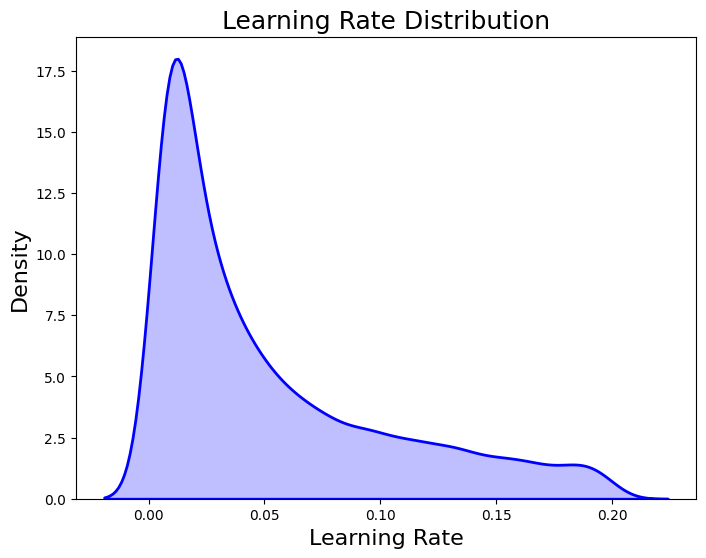

In [ ]:
learning_rate_dist = []

# Draw 10000 samples from the learning rate domain
for _ in range(10000):
    learning_rate_dist.append(sample(learning_rate)['learning_rate'])
    
plt.figure(figsize = (8, 6))
sns.kdeplot(learning_rate_dist, color = 'blue', linewidth = 2, shade = True);
plt.title('Learning Rate Distribution', size = 18); 
plt.xlabel('Learning Rate', size = 16); plt.ylabel('Density', size = 16);

The number of leaves is chosen from a uniform distribution. In this case, we used a discrete uniform distribution.

The code below creates a kernel density plot to visualize the distribution of a discrete uniform hyperparameter called num_leaves, which represents the maximum number of leaves in a decision tree used in a LightGBM model.

<ipython-input-36-c0ca576a9b0e>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(num_leaves_dist, linewidth = 2, shade = True);


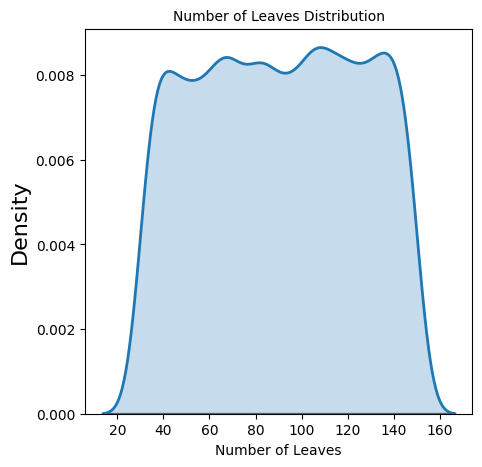

In [ ]:
# Discrete uniform distribution
num_leaves = {'num_leaves': hp.quniform('num_leaves', 30, 150, 1)}
num_leaves_dist = []

# Sample 10000 times from the number of leaves distribution
for _ in range(10000):
    num_leaves_dist.append(sample(num_leaves)['num_leaves'])
    
# kdeplot
plt.figure(figsize = (5, 5))
sns.kdeplot(num_leaves_dist, linewidth = 2, shade = True);
plt.title('Number of Leaves Distribution', size = 10); plt.xlabel('Number of Leaves', size = 10); plt.ylabel('Density', size = 16);

##**Conditional Domain**

Hyperopt allows us to use nested conditional statements to express dependencies between hyperparameters. For instance, we know that the goss boosting type does not allow subsampling, so when we define the categorical variable for boosting_type, we set the subsample to 1.0. On the other hand, for the other boosting types, subsample is defined as a float within the range of 0.5 to 1.0. To better understand this concept, consider the following example:

In [ ]:
# boosting type domain 
boosting_type = {'boosting_type': hp.choice('boosting_type', 
                                            [{'boosting_type': 'gbdt', 'subsample': hp.uniform('subsample', 0.5, 1)}, 
                                             {'boosting_type': 'dart', 'subsample': hp.uniform('subsample', 0.5, 1)},
                                             {'boosting_type': 'goss', 'subsample': 1.0}])}

# Draw a sample
params = sample(boosting_type)
params

{'boosting_type': {'boosting_type': 'gbdt', 'subsample': 0.6899530486604217}}

We need to set both the boosting_type and subsample as top-level keys in the parameter dictionary. We can use the Python dict.get method with a default value of 1.0. This means that if the key is not present in the dictionary, the value returned will be the default (1.0).

In [ ]:
# Retrieve the subsample if present otherwise set to 1.0
subsample = params['boosting_type'].get('subsample', 1.0)

# Extract the boosting type
params['boosting_type'] = params['boosting_type']['boosting_type']
params['subsample'] = subsample

params

{'boosting_type': 'gbdt', 'subsample': 0.6899530486604217}

Nested conditionals are used in Hyperopt to allow for the use of different sets of hyperparameters depending on the values of other hyperparameters. However, when using LightGBM, we cannot use a nested dictionary, so we need to set the boosting_type and subsample as top-level keys. This feature enables us to explore different models with entirely different sets of hyperparameters based on a choice hyperparameter. The choice hyperparameter is used to determine the first nested statement.

##**Complete Bayesian Domain**

Now we can define the entire domain. Each variable needs to have a label and a few parameters specifying the type and extent of the distribution. For the variables such as boosting type that are categorical, we use the choice variable. Other variables types include quniform, loguniform, and uniform. For the complete list, check out the documentation for Hyperopt.



In [ ]:
# Define the search space
space = {
    'class_weight': hp.choice('class_weight', [None, 'balanced']),
    'boosting_type': hp.choice('boosting_type', [{'boosting_type': 'gbdt', 'subsample': hp.uniform('gdbt_subsample', 0.5, 1)}, 
                                                 {'boosting_type': 'dart', 'subsample': hp.uniform('dart_subsample', 0.5, 1)},
                                                 {'boosting_type': 'goss', 'subsample': 1.0}]),
    'num_leaves': hp.quniform('num_leaves', 30, 150, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'subsample_for_bin': hp.quniform('subsample_for_bin', 20000, 300000, 20000),
    'min_child_samples': hp.quniform('min_child_samples', 20, 500, 5),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.6, 1.0)
}

**Example of Sampling from the Domain**

Let's sample from the domain (using the conditional logic) to see the result of each draw. Every time we run this code, the results will change. (Again notice that we need to assign the top level keys to the keywords understood by the GBM).

In [ ]:
# Sample from the full space
x = sample(space)

# Conditional logic to assign top-level keys
subsample = x['boosting_type'].get('subsample', 1.0)
x['boosting_type'] = x['boosting_type']['boosting_type']
x['subsample'] = subsample

x

{'boosting_type': 'goss',
 'class_weight': None,
 'colsample_bytree': 0.9092952108910668,
 'learning_rate': 0.026182004918757936,
 'min_child_samples': 460.0,
 'num_leaves': 71.0,
 'reg_alpha': 0.77067239194591,
 'reg_lambda': 0.2446316774179519,
 'subsample_for_bin': 160000.0,
 'subsample': 1.0}

In [ ]:
x = sample(space)
subsample = x['boosting_type'].get('subsample', 1.0)
x['boosting_type'] = x['boosting_type']['boosting_type']
x['subsample'] = subsample
x

{'boosting_type': 'dart',
 'class_weight': None,
 'colsample_bytree': 0.7698553016384372,
 'learning_rate': 0.042096512795485784,
 'min_child_samples': 450.0,
 'num_leaves': 58.0,
 'reg_alpha': 0.7366700119328365,
 'reg_lambda': 0.5771314976504541,
 'subsample_for_bin': 100000.0,
 'subsample': 0.9269777580007008}

**Results History**

The final part is the result history. Here, we are using two methods to make sure we capture all the results:

A Trials object that stores the dictionary returned from the objective function Writing to a csv file every iteration The csv file option also lets us monitor the results of an on-going experiment. Lets save it in our google drive

In [ ]:
from google.colab import drive
import csv

# Mount your Google Drive
drive.mount('/content/drive')

# File to save first results in your Google Drive
out_file = '/content/gdrive/MyDrive/gbm_trials.csv'

# Open the file and write the headers
with open(out_file, 'w') as of_connection:
    writer = csv.writer(of_connection)
    writer.writerow(['loss', 'params', 'iteration', 'estimators', 'train_time'])


Now its saved in our drive which we will use later for obtaining the best results as you can see the below snapshot
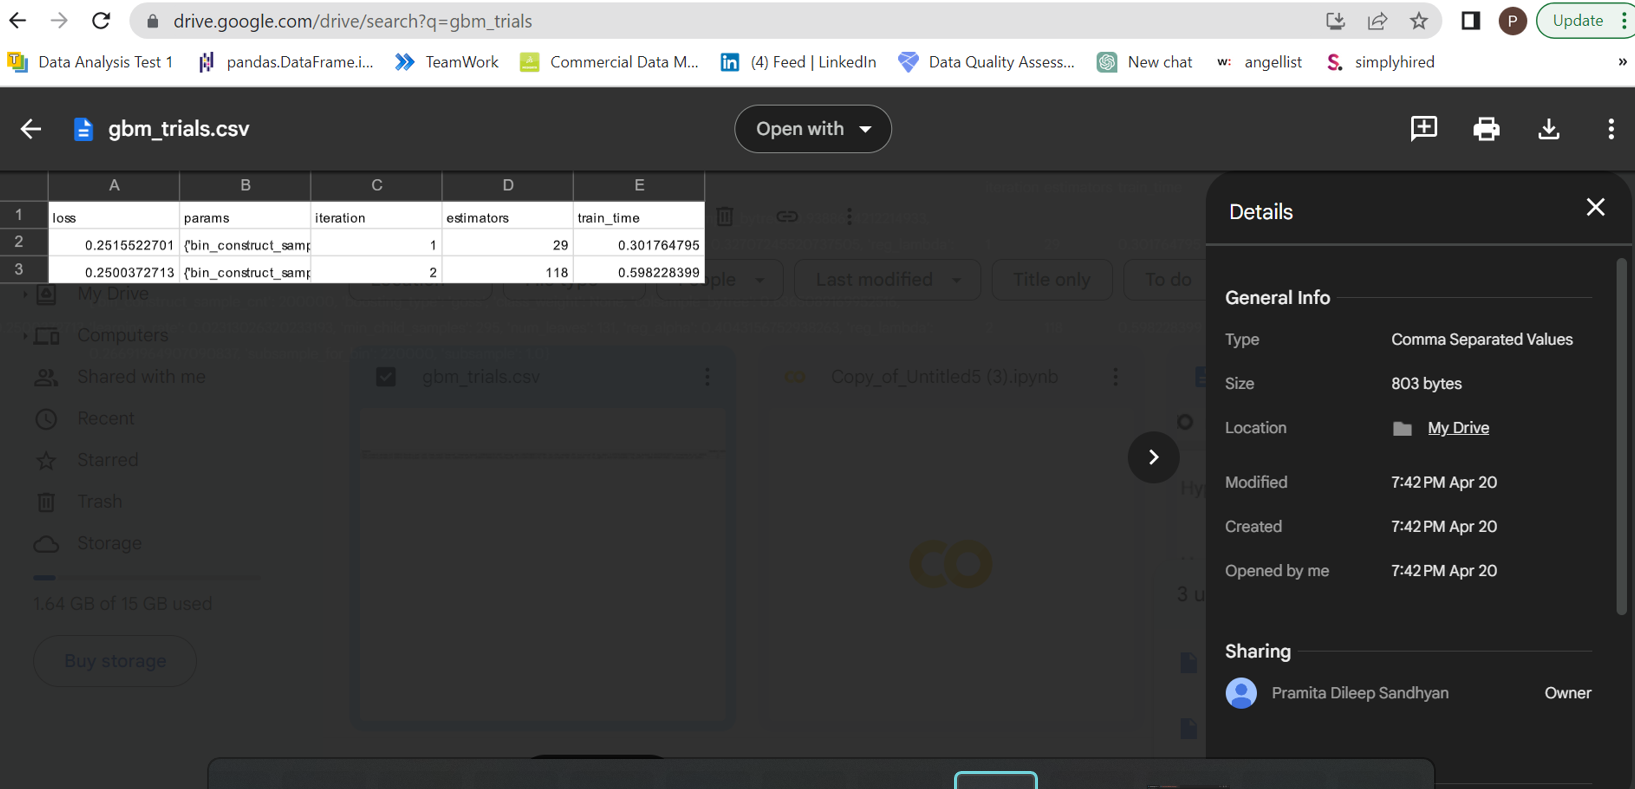

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir('/content/gdrive/My Drive/')
import pandas as pd


Mounted at /content/gdrive


In [ ]:
results = pd.read_csv('gbm_trials.csv')
# Sort with best scores on top and reset index for slicing
results.sort_values('loss', ascending = True, inplace = True)
results.reset_index(inplace = True, drop = True)


In [ ]:
import ast

# Convert from a string to a dictionary
ast.literal_eval(results.loc[0, 'params'])

{'bin_construct_sample_cnt': 200000,
 'boosting_type': 'goss',
 'class_weight': None,
 'colsample_bytree': 0.6365089169952516,
 'learning_rate': 0.02313026320233193,
 'min_child_samples': 295,
 'num_leaves': 131,
 'reg_alpha': 0.4043156752938263,
 'reg_lambda': 0.26691964907090837,
 'subsample_for_bin': 220000,
 'subsample': 1.0}

**Trials** is a class that is used to keep track of the results obtained during an optimization search using the Bayesian optimization algorithm. In Bayesian optimization, a set of candidate hyperparameters are chosen based on the results of previous trials. The Trials object is used to store the results of these trials, including the hyperparameter settings and their corresponding objective function values.

The code also creates an instance of the Trials class called bayes_trials. This object will be used to store the results of the Bayesian optimization search, allowing us to analyze the results and choose the best hyperparameters.







In [ ]:
from hyperopt import Trials

# Keep track of results
bayes_trials = Trials()

In [ ]:
from hyperopt import tpe

# optimization algorithm
tpe_algorithm = tpe.suggest

In [ ]:
from hyperopt import fmin

In [ ]:
%%capture

# Global variable
global  ITERATION

ITERATION = 0

# Run optimization
best = fmin(fn = objective, space = space, algo = tpe.suggest, 
            max_evals = MAX_EVALS, trials = bayes_trials, rstate = np.random.RandomState(50))

In the above code, the %%capture cell magic function is a Jupyter notebook magic function that captures the stdout and stderr output generated by the code and stores them in a variable instead of displaying them on the screen. It is used to suppress the output generated by the optimization algorithm while it is running.

Regarding the rest of the code, it is using the fmin function from the hyperopt module to perform Bayesian optimization search over a hyperparameter search space. The objective function is the function being optimized, which takes a set of hyperparameters as input and returns a scalar value that represents the performance of the model using those hyperparameters.

The space parameter represents the search space over which the Bayesian optimization search will be performed. It is defined as a hyperparameter distribution or a set of hyperparameters to search over.

The algo parameter specifies the optimization algorithm used to guide the search, in this case, the Tree-structured Parzen Estimator (TPE) algorithm is used, which is a popular choice for hyperparameter optimization.

The max_evals parameter specifies the maximum number of evaluations of the objective function that the algorithm is allowed to perform during the search process.

The trials parameter is an instance of the Trials class that was created earlier, which will store the results of the search.

The rstate parameter is an optional parameter that allows setting the random state for the optimization algorithm to ensure reproducibility.

Finally, the best variable contains the best set of hyperparameters found by the optimization algorithm, which maximizes or minimizes the objective function depending on whether the optimization problem is a maximization or minimization problem.

In [ ]:
# Sort the trials with lowest loss (highest AUC) first
bayes_trials_results = sorted(bayes_trials.results, key = lambda x: x['loss'])


The above code is sorting the results of a Bayesian optimization search stored in the bayes_trials object in ascending order of loss (i.e., the value of the objective function that was minimized or maximized during the search process). The sorted list can be used to analyze the performance of the optimization search and select the best set of hyperparameters that resulted in the lowest loss (highest AUC) value.

In [ ]:
# Extract the ideal number of estimators and hyperparameters
best_bayes_estimators = int(results.loc[0, 'estimators'])
best_bayes_params = ast.literal_eval(results.loc[0, 'params']).copy()

# Re-create the best model and train on the training data
best_bayes_model = lgb.LGBMClassifier(n_estimators=best_bayes_estimators, n_jobs = -1, 
                                       objective = 'binary', random_state = 50, **best_bayes_params)
best_bayes_model.fit(features, labels)

The above code extracts the ideal number of estimators and hyperparameters for a LightGBM classifier model trained using a Bayesian optimization search. It recreates the best model using the extracted hyperparameters and number of estimators, and then trains it on the full dataset. This is a common pattern used in hyperparameter optimization to create a final optimized model.

In [ ]:
# Evaluate on the testing data 
preds = best_bayes_model.predict_proba(test_features)[:, 1]
print('The best model from Bayes optimization scores {:.5f} AUC ROC on the test set.'.format(roc_auc_score(test_labels, preds)))

The best model from Bayes optimization scores 0.98294 AUC ROC on the test set.


# **Conclusion**

This notebook demonstrated the implementation of automated hyperparameter tuning using Bayesian Optimization techniques with the help of the Hyperopt library and Tree Parzen Estimator. Bayesian model-based optimization is generally considered more efficient than random search, as it can find a better set of hyperparameters in fewer search iterations. However, it's important to note that the validation set's performance does not necessarily reflect the testing set's performance, and overfitting remains a significant challenge in machine learning.

The Bayesian optimization approach can be used to tune any machine learning model by defining an objective function to minimize and a domain space to search. This technique can extend beyond hyperparameter tuning and can be used to minimize any function. Bayesian optimization is now a popular option for hyperparameter tuning due to its ease of use in Python. Although there is no single best answer for hyperparameter tuning, Bayesian optimization methods should be a useful tool for data scientists in the tedious but necessary task of model tuning.

# **References**


1.   https://towardsdatascience.com/hyperparameters-optimization-526348bb8e2d
2.   https://www.freecodecamp.org/news/hyperparameter-optimization-techniques-machine-learning/
3. For random and grid search: https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/
4. For bayesian-hyperparameter-optimization: https://www.run.ai/guides/hyperparameter-tuning/bayesian-hyperparameter-optimization
5. https://www.kdnuggets.com/2020/05/hyperparameter-optimization-machine-learning-models.html
6. https://www.jeremyjordan.me/hyperparameter-tuning/



# **License**

Copyright (C) 2023 Pramita Dileep Sandhyan

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.